In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve,roc_auc_score,auc

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import load_model

import sympy as sp

Using TensorFlow backend.


In [3]:
LABELS = ['Fall','Non Fall']
LABEL = 'ActivityEncoded'
TIME_PERIODS = 80
STEP_DISTANCE = 40


def create_segments_and_labels(df, time_steps, step, label_name):

    N_FEATURES = 3
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['Ax'].values[i: i + time_steps]
        ys = df['Ay'].values[i: i + time_steps]
        zs = df['Az'].values[i: i + time_steps]
     
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([xs,ys,zs])
        labels.append(label)


    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

def create_segments_and_labels_stats(df, time_steps, step, label_name):

    N_FEATURES = 4
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        Ax = df['Ax'].values[i: i + time_steps]
        Ay = df['Ay'].values[i: i + time_steps]
        Az = df['Az'].values[i: i + time_steps]
#         Max = df['Max'].values[i: i + time_steps]
#         Min = df['Min'].values[i: i + time_steps]
#         Mean = df['Mean'].values[i: i + time_steps]
#         Median = df['Median'].values[i: i + time_steps]
#         Std = df['Std'].values[i: i + time_steps]
#         Mad = df['Mad'].values[i: i + time_steps]
        SMV = df['SMV'].values[i: i + time_steps]
        
        labs = [Ax,Ay,Az,SMV]
    
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append(labs)
        labels.append(label)
        


    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

def read_data(file_path,User_number,Activity_class):
    User = []
    Activity = []
    
    column_names = ['ID',
                    'Ax',
                    'Ay',
                    'Az',
                        ]  
    
    
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)
    df = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13],axis = 0)
    df = df.reset_index()
    df = df.drop(['index'],axis=1)
    
    for i in range(len(df['Ax'])):
        a = User_number
        User.append(User_number)
    for j in range(len(df['Ax'])):
        b = Activity_class
        Activity.append(Activity_class)
        
    df['Activity'] = Activity
    df['User'] = User
    
    df['User'] = df['User'].apply(convert_to_int)
    df['Ax'] = df['Ax'].apply(convert_to_float)
    df['Ay'] = df['Ay'].apply(convert_to_float)
    df['Az'] = df['Az'].apply(convert_to_float)
    df = df[['ID','User','Activity','Ax','Ay','Az']]
    
   
    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan

def convert_to_int(x):

    try:
        return np.int(x)
    except:
        return np.nan
 

In [4]:
#Prediction Function
def predictions(model):
    a = model
    y_pred_ROC = a.predict_proba(x_out)
    y_pred_ROC_test = np.argmax(y_pred_ROC, axis=1)
    
    return y_pred_ROC_test

#Output Output 0,1's and length of predicative array
def visual(predicative_matrix):
    a = predicative_matrix
    b = len(a)
    
    return a,b

#Probability Function
def probability_fall(a):
    b = a
    zeros = []
    ones = []
    for i in range(len(b)):
        if y_pred_ROC_test[i] == 0:
            zeros.append(i)
        if y_pred_ROC_test[i] == 1:
            ones.append(i)
    prob = (len(zeros))/(len(ones)+len(zeros))
    
    return prob

In [83]:
# 0 is a Fall, 1 is a non fall

def load_data():
    
    
    
    JUM_40= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_40_1.txt',40,'Jumping')
    FOL_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_1_1.txt',1,'Forward Lying Fall')
    JUM_46 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_46_1.txt',46,'Jumping')
    JUM_46 = JUM_46[['Ax','Ay','Az']]
    Jogging = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Non-fall\Jogging.xlsx')
    Jogging = Jogging[['Ax','Ay','Az']]
    FKL_44 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_44_1.txt',44,'Forward Knees Fall')
    Jumping = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Non-fall\Jumping.xlsx')
    Chair_fall = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Fall\Chair fall.xlsx')
    Chair_fall = Chair_fall[['Ax','Ay','Az']]
    Side_fall = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Fall\Side fall.xlsx')
    Side_fall = Side_fall[['Ax','Ay','Az']]
    Forward_Fall = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Fall\Forward Fall.xlsx')
    Forward_Fall = Forward_Fall[['Ax','Ay','Az']]
    Knees_fall = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Scripted\Thigh (Pocket)\Cleaned\Fall\Knees fall.xlsx')
    Knees_fall = Knees_fall[['Ax','Ay','Az']]
    dws = pd.read_csv(r'C:\Users\Ash\Desktop\B_Accelerometer_data\dws_1\sub_1.csv')
    dws.columns = ['unamed', 'Ax','Ay', 'Az']
    jog = pd.read_csv(r'C:\Users\Ash\Desktop\B_Accelerometer_data\jog_9\sub_1.csv')
    jog.columns = ['unamed', 'Ax','Ay', 'Az']
    walking = pd.read_csv(r'C:\Users\Ash\Desktop\test data\walkingdata.csv',delimiter=";", decimal=",")
    jog_test = pd.read_csv(r'C:\Users\Ash\Desktop\test data\Jogging.csv',delimiter=";", decimal=",")
    jog_test.columns = ['Time','Ax','Ay','Az']
    activity = pd.read_csv(r'C:\Users\Ash\Desktop\test data\activity.csv',delimiter=";", decimal=",")
    activity.columns = ['Time','Ax','Ay','Az']
    fall_forward = pd.read_csv(r'C:\Users\Ash\Desktop\test data\fallforward.csv',delimiter=";", decimal=",")
    fall_forward.columns = ['Time','Ax','Ay','Az']
    falling = pd.read_csv(r'C:\Users\Ash\Desktop\test data\falling.csv',delimiter=";", decimal=",")
    falling.columns = ['Time','Ax','Ay','Az']
   
#     data = pd.read_csv(r'C:\Users\Ash\Desktop\WISDM_ar_v1.1\WISDM_ar_v1.1_raw.txt',header=None)
#     data.columns = ['User','Activity','Ax','Ay','Az']
    ##Unseen Data
#     ADL = pd.read_excel(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Datasets\Ashton\Unscripted ADL\Cleaned\Unscripted ADL.xlsx')
#     ADL = ADL[['Ax','Ay','Az']]
    
    return falling

def scaling(type_of_scaling_method,df):
    
    df_A_before = df
    
    #Z-score normalisation
    if type_of_scaling_method == 0:
        df_A_before['Ax'] = (df_A_before['Ax'] - np.mean(df_A_before['Ax']))/(np.std(df_A_before['Ax']))
        df_A_before['Ay'] = (df_A_before['Ay'] - np.mean(df_A_before['Ay']))/(np.std(df_A_before['Ay']))
        df_A_before['Az'] = (df_A_before['Az'] - np.mean(df_A_before['Az']))/(np.std(df_A_before['Az']))
        
    # Min – Max Normalization
    if type_of_scaling_method == 1:
        df_A_before['Ax'] = (df_A_before['Ax'] - df_A_before['Ax'].min())/(df_A_before['Ax'].max() - df_A_before['Ax'].min())
        df_A_before['Ay'] = (df_A_before['Ay'] - df_A_before['Ay'].min())/(df_A_before['Ay'].max() - df_A_before['Ay'].min())
        df_A_before['Az'] = (df_A_before['Az'] - df_A_before['Az'].min())/(df_A_before['Az'].max() - df_A_before['Az'].min())
        
    
    #Normalisation
    if type_of_scaling_method == 2:
        df_A_before['Ax'] = df_A_before['Ax']/df_A_before['Ax'].max()
        df_A_before['Ay'] = df_A_before['Ay']/df_A_before['Ay'].max()
        df_A_before['Az'] = df_A_before['Az']/df_A_before['Az'].max()
    #L1_norm
    if type_of_scaling_method == 3:
        df_A_before['Ax'] = df_A_before['Ax']/np.sum(df_A_before['Ax'])
        df_A_before['Ay'] = df_A_before['Ay']/np.sum(df_A_before['Ay'])
        df_A_before['Az'] = df_A_before['Az']/np.sum(df_A_before['Az'])
    
    #Raw
    if type_of_scaling_method == 4:
        df_A_before = df

    return df_A_before


Z_score = 0
Min_max_normalization = 1
Normalisation = 2
L1_norm = 3
Raw = 4

# Change Below Cell to Transform Data

In [84]:
df_A = load_data()
df_A.head()

,Time,Ax,Ay,Az
0,0.010,-0.23,0.80,-0.91
1,0.010,-0.18,0.80,0.31
2,0.020,0.90,0.29,0.57
3,0.033,0.49,0.12,0.76
4,0.039,0.21,0.29,1.36


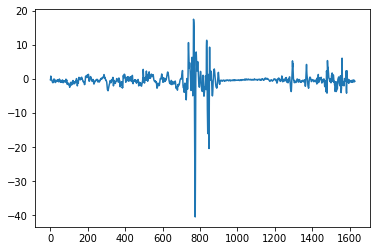

In [85]:
plt.plot(df_A['Ax'])

In [86]:
df_sig = scaling(4,df_A)
df_sig.head()

,Time,Ax,Ay,Az
0,0.010,-0.23,0.80,-0.91
1,0.010,-0.18,0.80,0.31
2,0.020,0.90,0.29,0.57
3,0.033,0.49,0.12,0.76
4,0.039,0.21,0.29,1.36


In [87]:
df_raw = df_sig[['Ax','Ay','Az']]

df_max = df_raw.max(axis=1)
df_max = pd.DataFrame(df_max,columns=['Max'])

df_min = df_raw.min(axis=1)
df_min = pd.DataFrame(df_min,columns=['Min'])

df_mean = np. mean(df_raw,axis=1)
df_mean = pd.DataFrame(df_mean,columns=['Mean'])

df_median = df_raw.median(axis=1)
df_median = pd.DataFrame(df_median,columns=['Median'])

df_std = df_raw.std(axis=1)
df_std = pd.DataFrame(df_std,columns=['Std'])

df_mad = df_raw.mad(axis=1)
df_mad = pd.DataFrame(df_mad,columns=['Mad'])

df_smv = np.sqrt(df_raw['Ax']**2 + df_raw['Ay']**2 + df_raw['Az']**2 )
df_smv = pd.DataFrame(df_smv,columns=['SMV'])



df_stat = pd.concat([df_raw,df_max,df_min,df_mean,df_median,df_std,df_mad,df_smv],axis=1)

df = df_stat
df.head()

,Ax,Ay,Az,Max,Min,Mean,Median,Std,Mad,SMV
0,-0.23,0.80,-0.91,0.80,-0.91,-0.113333,-0.23,0.860949,0.608889,1.233288
1,-0.18,0.80,0.31,0.80,-0.18,0.310000,0.31,0.490000,0.326667,0.876641
2,0.90,0.29,0.57,0.90,0.29,0.586667,0.57,0.305341,0.208889,1.104083
3,0.49,0.12,0.76,0.76,0.12,0.456667,0.49,0.321299,0.224444,0.912195
4,0.21,0.29,1.36,1.36,0.21,0.620000,0.29,0.642106,0.493333,1.406343


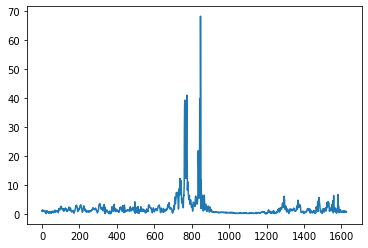

In [88]:
plt.plot(df['SMV'])

In [89]:
#Raw Signals
x_out, y_out = create_segments_and_labels(df,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              'Ax')
num_time_periods2, num_sensors2 = x_out.shape[1], x_out.shape[2]
input_shape2 = (num_time_periods2*num_sensors2)
x_out = x_out.reshape(x_out.shape[0], input_shape2)
x_out = x_out.astype('float32')

# #Stats Signals
# x_out, y_out = create_segments_and_labels_stats(df,
#                                               TIME_PERIODS,
#                                               STEP_DISTANCE,
#                                               'Ax')
# num_time_periods2, num_sensors2 = x_out.shape[1], x_out.shape[2]
# input_shape2 = (num_time_periods2*num_sensors2)
# x_out = x_out.reshape(x_out.shape[0], input_shape2)
# x_out = x_out.astype('float32')

# Loading Different Keras Models

In [90]:
# model_XYZ = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Standardized and Normalized\Model(XYZ).h5')
# model_XYZ_z_score = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Standardized and Normalized\Model(XYZ)(Z-SCORE).h5')
# model_XYZ_min_max = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Standardized and Normalized\Model(XYZ)(MIN-MAX).h5')
# model_XYZ_normalisation = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Standardized and Normalized\Model(XYZ)(NORMALISATION).h5')
# model_XYZ_SMV_normalisation = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Standardized and Normalized\Model(XYZ)(SMV)(NORMALISATION).h5')
# model_XYZ_SMV_z_score = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Standardized and Normalized\Model(XYZ)(SMV)(Z-SCORE).h5')
# model_XYZ_SMV_z_score_SMOTE = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Standardized and Normalized\Model(XYZ)(SMV)(Z-SCORE)(SMOTE).h5')
# model_XYZ_normalisation_SMOTE = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Standardized and Normalized\Model(XYZ)(NORMALISATION)(SMOTE).h5')
# model_XYZ_LSTM = load_model(r'C:\Users\Ash\Desktop\Final Year 2nd Semester\MRN 422\Jupyter Notebooks\Final\Models\Standardized and Normalized\Model(XYZ)(LSTM).h5')

In [91]:
y_pred_ROC_test = predictions(model_XYZ_LSTM)

In [92]:
print('Probability of a Fall:',(probability_fall(visual(y_pred_ROC_test)[0]))*100,'%')

Probability of a Fall: 0.0 %


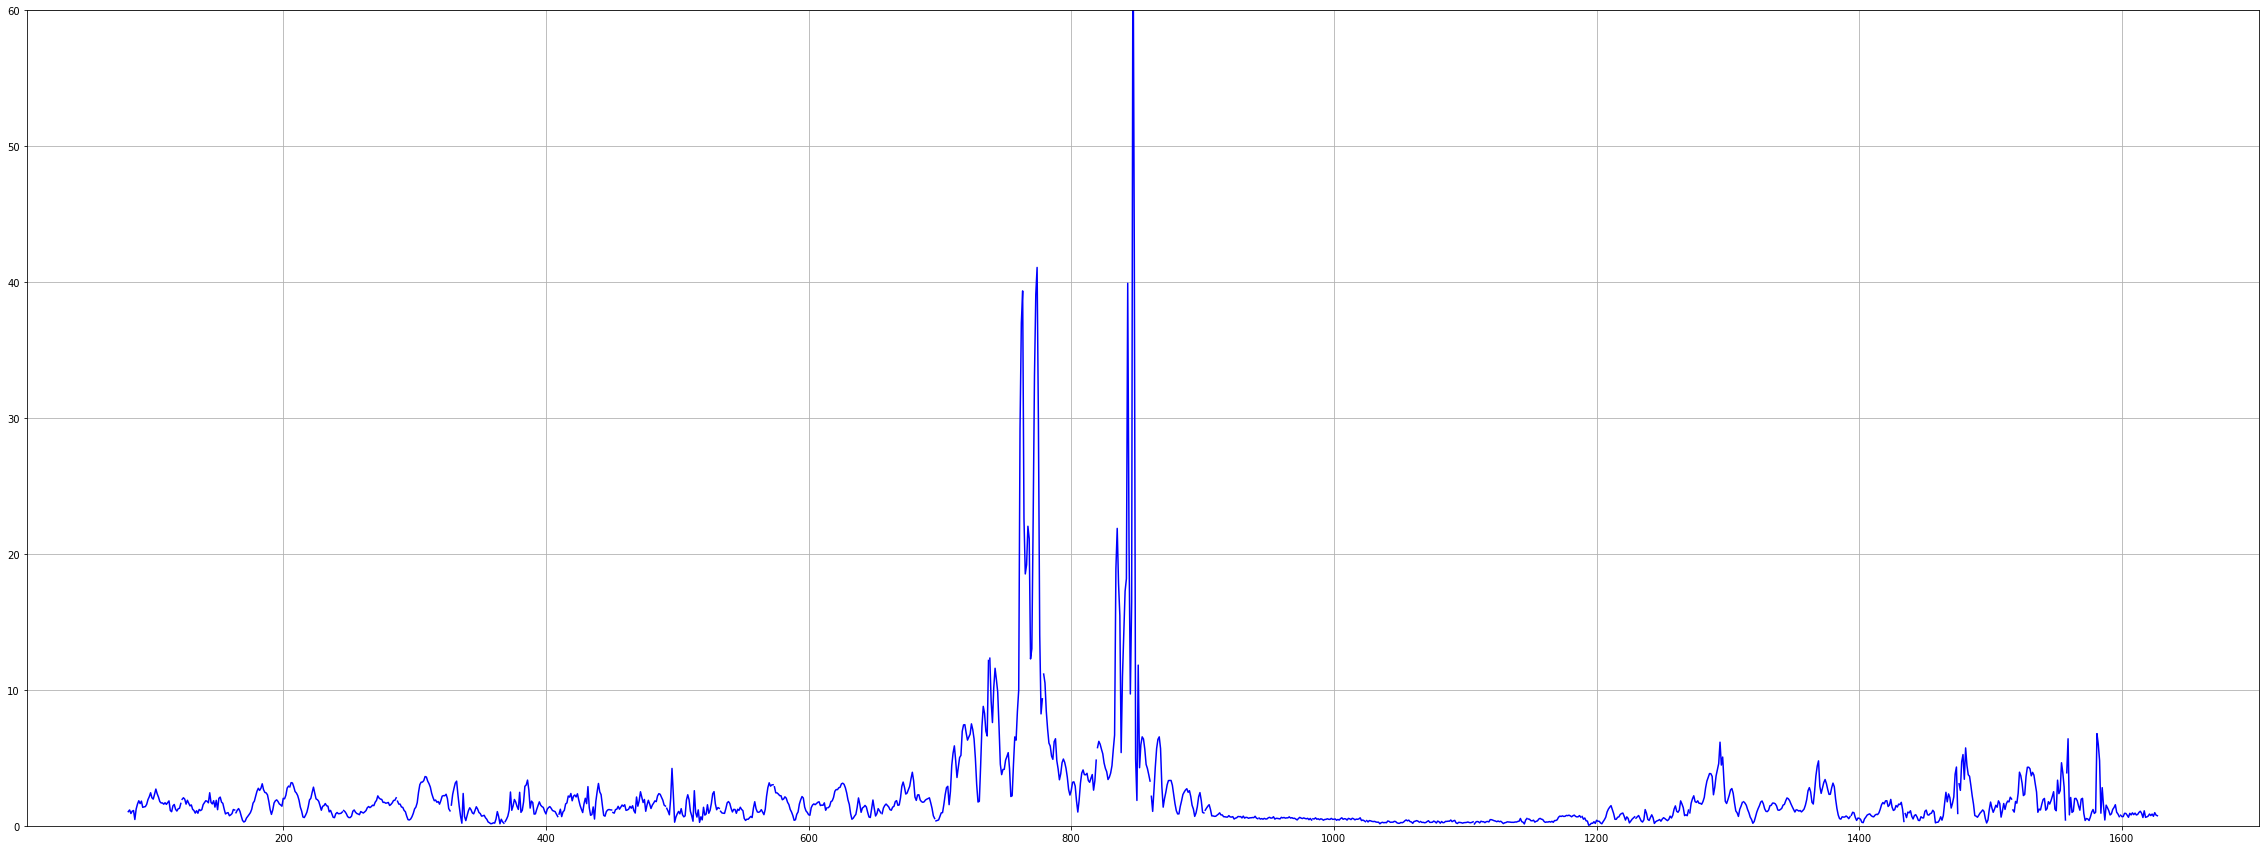

In [93]:
ylimit = 60

a = int((df.shape[0])/(visual(y_pred_ROC_test)[1]))
b = a

red = 0
blue = 1
red_line = 'r-'
blue_line = 'b-'

steps =[]

for i in range(visual(y_pred_ROC_test)[1]):
    a = a + b
    steps.append(a)
    
for i in range(len(steps)):
    
    plt.figure(num = 1,figsize=(40,15))
    
    if visual(y_pred_ROC_test)[0][i] == red:
#         plt.title(str(visual(y_pred_ROC_test)[0][i]))
        plt.grid('Fine')
        plt.ylim([0,ylimit])
        plt.plot(df['SMV'][steps[i-1]:steps[i]],red_line)
    
    elif visual(y_pred_ROC_test)[0][i] == blue:
#         plt.title(str(visual(y_pred_ROC_test)[0][i]))
        plt.grid('Fine',)
        plt.ylim([0,ylimit])
        plt.plot(df['SMV'][steps[i-1]:steps[i]],blue_line)

In [94]:
print('Predicative Array :',visual(y_pred_ROC_test)[0])
print('Number of Sliding Windows :',visual(y_pred_ROC_test)[1])
print('Probability of a Fall:',(probability_fall(visual(y_pred_ROC_test)[0]))*100,'%')

Predicative Array : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Number of Sliding Windows : 39
Probability of a Fall: 0.0 %
